## Data Cleaning

### Imports 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, max_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#Unused models--delete later
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import statsmodels.formula.api as smf
from scipy import stats

### Read and explore Data.csv

In [30]:
df = pd.read_csv("../data/Data.csv")

### Change some objects into floats and ints

In [31]:
df['Target_Revenues']=df['Target_Revenues'].str.replace(',','')
df['Target_Revenues'] = df.Target_Revenues.astype(float)

df['Target_EBITDA']=df['Target_EBITDA'].str.replace(',','')
df['Target_EBITDA']=df.Target_EBITDA.astype(float)

df['Target_EV']=df['Target_EV'].str.replace(',','')
df['Target_EV']=df.Target_EV.astype(float)

df['Year']=df['Year'].str.replace(',','')
df['Year']=df.Year.astype(float)
df['Year']=df.Year.astype(int)

### Change 'Date' from 'object' to 'datetime'

In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

### Remove 'Government and Agencies' from Target Industry

In [33]:
df = df[df['Target_Industry_Macro'] != 'Government and Agencies']
print('Shape after removal:', df.shape)

Shape after removal: (14768, 17)


### Remove Nulls

In [34]:
df = df.dropna()
#nan_count=df.isnull().sum()
#print(nan_count)
#print('')
print('Shape after nulls:', df.shape)

Shape after nulls: (14766, 17)


### Remove Outliers

In [35]:
#Keep EV_Rev < 100
df = df[df['EV_Rev'] < 100]
#Keep EV_EBITDA >-100 and <100
df = df[df['EV_EBITDA'] > -100]  #was -100
df = df[df['EV_EBITDA'] < 100]  #was 100

print('Shape after removing outliers:', df.shape)

Shape after removing outliers: (13786, 17)


In [36]:
#Remove companies with EBITDA < Revenues
df = df[df['Target_Revenues'] > df['Target_EBITDA']]
df.shape

(13715, 17)

### One Hot Encoding

In [37]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Greenland': 'North America',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Belgium': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Austria': 'Western Europe',
    'Liechtenstein': 'Western Europe',
    'Monaco': 'Western Europe',
    'United Kingdom': 'UK',
    'Jersey': 'UK',
    'Guernsey': 'UK',
    'Isle of Man': 'UK',
    'Ireland': 'UK',
    'Sweden': 'Nordics',
    'Norway': 'Nordics',
    'Denmark': 'Nordics',
    'Finland': 'Nordics',
    'Iceland': 'Nordics',
    'Poland': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Russia': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Moldova': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Montenegro': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Croatia': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Malta': 'Southern Europe',
    'Gibraltar': 'Southern Europe',
    'Turkey': 'Southern Europe'
}

# Apply the updated mapping to create a new column
df['Target_Region'] = df['Target_Nation'].map(country_to_region)

# One-hot encode the 'Target_Region' column
df = pd.get_dummies(df, columns=['Target_Region'])
df = pd.get_dummies(df, columns=['Target_Industry_Macro'])
df = pd.get_dummies(df, columns=['Target_Status'])
df = df.drop(columns=['Target_Status_Private'])

In [38]:
#df['EBITDA_Margin'] = df['Target_EBITDA'] / df['Target_Revenues']
df.head()

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,Target_Industry_Macro_Financials,Target_Industry_Macro_Healthcare,Target_Industry_Macro_High Technology,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,0,0,0,1,0,0,0,0,0,1
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0,0,1,0,0,0,0,0,0,1
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0,0,0,0,0,0,0,0,0,1
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0,0,1,0,0,0,0,0,0,1
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0,0,0,0,0,0,0,0,0,1


### Log Transformations

In [63]:
df['Target_EBITDA'].describe()

count     13715.000000
mean        423.355355
std        2946.326041
min       -6847.300000
25%           0.610000
50%          13.720000
75%         119.575000
max      134717.010000
Name: Target_EBITDA, dtype: float64

In [64]:
df['log_Target_EV'] = df['Target_EV'].apply(lambda x: np.log(x))
df['log_Target_Revenues'] = df['Target_Revenues'].apply(lambda x: np.log(x))

# To allow negative EBITDAs, scale values from 0-1, then apply log
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Target_EBITDA_yeojohnson'] = pt.fit_transform(df[['Target_EBITDA']])

#check df
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,log_Target_EBITDA,YearMonth,EV_EBITDA_MonthlyMedian,Market_Condition,Median_Deviation,Market_Condition_A,Market_HM,Market_LM,Market_NM,Target_EBITDA_yeojohnson
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,0.047234,2024-08,2.35,0,-6.02,LM,0,1,0,-0.139426
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0.047229,2024-08,2.35,0,-6.02,LM,0,1,0,-0.140610
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0.047223,2024-08,2.35,0,-6.02,LM,0,1,0,-0.141830
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0.047243,2024-08,2.35,0,-6.02,LM,0,1,0,-0.137751
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0.047226,2024-08,2.35,0,-6.02,LM,0,1,0,-0.141132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13710,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,0.058788,2014-01,8.66,1,0.29,NM,0,0,1,0.647253
13711,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0.085609,2014-01,8.66,1,0.29,NM,0,0,1,2.006511
13712,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0.051109,2014-01,8.66,1,0.29,NM,0,0,1,0.178053
13713,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0.053592,2014-01,8.66,1,0.29,NM,0,0,1,0.339448


In [65]:
df['Target_EBITDA_yeojohnson'].describe()

count    13715.000000
mean         0.000000
std          1.000036
min        -37.534198
25%         -0.138298
50%         -0.125376
75%         -0.053292
max         28.689831
Name: Target_EBITDA_yeojohnson, dtype: float64

<AxesSubplot:xlabel='Target_EBITDA_yeojohnson', ylabel='Count'>

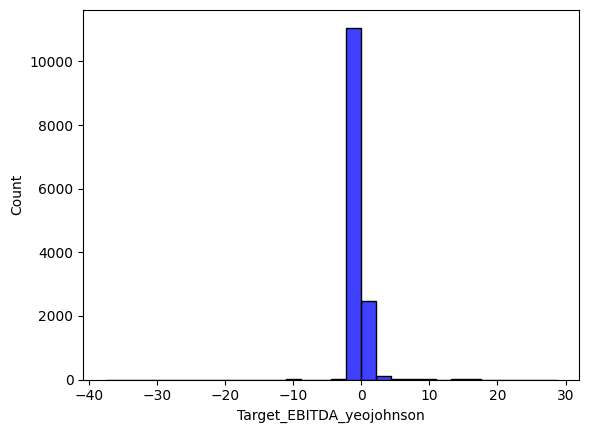

In [66]:
sns.histplot(df['Target_EBITDA_yeojohnson'], bins=30, color='blue')

<AxesSubplot:>

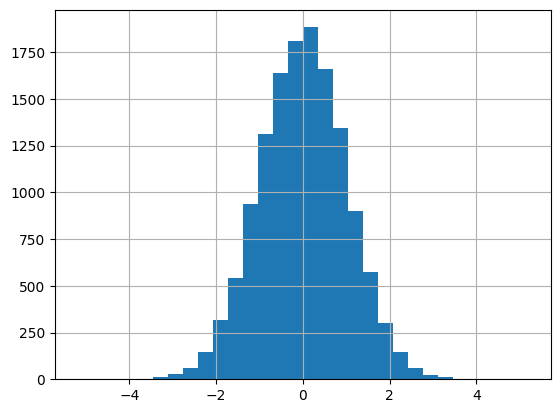

In [74]:
from sklearn.preprocessing import QuantileTransformer

# Apply quantile transformation to get a normal distribution
qt = QuantileTransformer(output_distribution='normal')
df['Target_EBITDA_quantile'] = qt.fit_transform(df[['Target_EBITDA']])

# Check the distribution
df['Target_EBITDA_quantile'].hist(bins=30)

### Engineer 'Market_Condition' (Ordinal) from Date

In [42]:
# Step 1: Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Create 'YearMonth' from the 'Date' column for grouping and calculations
df['YearMonth'] = df['Date'].dt.to_period('M')

# Step 3: Calculate the monthly median EV/EBITDA for each YearMonth
monthly_median = df.groupby('YearMonth')['EV_EBITDA'].median().reset_index()

# Step 4: Rename the median column for clarity
monthly_median.rename(columns={'EV_EBITDA': 'EV_EBITDA_MonthlyMedian'}, inplace=True)

# Step 5: Merge the monthly medians back into the original DataFrame
df = pd.merge(df, monthly_median, on='YearMonth', how='left')

# Step 6: Calculate quantiles for the monthly medians
quantiles = df['EV_EBITDA_MonthlyMedian'].quantile([0.1, 0.5, 0.9])
q1 = quantiles[0.1]  # First quantile
q2 = quantiles[0.5]   # Median
q3 = quantiles[0.9]  # Third quantile

# Step 7: Define function to classify market conditions
def classify_market_condition(row):
    if row['EV_EBITDA_MonthlyMedian'] < q1:
        return 0  # Low Market
    elif row['EV_EBITDA_MonthlyMedian'] <= q3:
        return 1  # Normal Market
    else:
        return 2  # High Market

# Step 8: Apply the function to create the 'Market_Condition' column
df['Market_Condition'] = df.apply(classify_market_condition, axis=1)

# Step 9: Calculate the overall median of the entire dataset
overall_median = df['EV_EBITDA'].median()

# Step 10: Create a new column for the deviation of the monthly median from the overall median
df['Median_Deviation'] = df['EV_EBITDA_MonthlyMedian'] - overall_median

# Step 11: Display the DataFrame to ensure everything worked
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,Target_Industry_Macro_Telecommunications,Target_Status_Public,log_Target_EV,log_Target_Revenues,scale_Target_EBITDA,log_Target_EBITDA,YearMonth,EV_EBITDA_MonthlyMedian,Market_Condition,Median_Deviation
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,0,1,1.057790,1.324419,0.048367,-3.028933,2024-08,2.35,0,-6.02
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0,1,2.577942,3.733136,0.048362,-3.029049,2024-08,2.35,0,-6.02
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0,1,1.363537,-0.020203,0.048356,-3.029160,2024-08,2.35,0,-6.02
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0,1,2.423917,0.996949,0.048376,-3.028746,2024-08,2.35,0,-6.02
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0,1,1.768150,0.887891,0.048359,-3.029097,2024-08,2.35,0,-6.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13710,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,0,1,10.537536,9.391329,0.060550,-2.804279,2014-01,8.66,1,0.29
13711,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0,1,10.731462,9.686151,0.089380,-2.414854,2014-01,8.66,1,0.29
13712,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0,1,9.348307,7.522579,0.052438,-2.948132,2014-01,8.66,1,0.29
13713,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0,1,9.873152,7.924431,0.055054,-2.899444,2014-01,8.66,1,0.29


In [43]:
#Remove soon
print(q1, q2, q3)

5.975 8.5 10.795


#### Try 'Market_Condition' One Hot Encoded

In [44]:
def classify_market_condition_ohe(row):
    if row['EV_EBITDA_MonthlyMedian'] < q1:
        return 'LM'  # Low Market
    elif row['EV_EBITDA_MonthlyMedian'] <= q3:
        return 'NM'  # Normal Market
    else:
        return 'HM'  # High Market
# Apply the function to create the ‘Market_Condition’ column
df['Market_Condition_OHE'] = df.apply(classify_market_condition_ohe, axis=1)
# One-hot encode the ‘Market_Condition’ column
df['Market_Condition_A'] = df['Market_Condition_OHE']
df = pd.get_dummies(df, columns=['Market_Condition_OHE'], prefix='Market')
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,scale_Target_EBITDA,log_Target_EBITDA,YearMonth,EV_EBITDA_MonthlyMedian,Market_Condition,Median_Deviation,Market_Condition_A,Market_HM,Market_LM,Market_NM
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,0.048367,-3.028933,2024-08,2.35,0,-6.02,LM,0,1,0
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0.048362,-3.029049,2024-08,2.35,0,-6.02,LM,0,1,0
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0.048356,-3.029160,2024-08,2.35,0,-6.02,LM,0,1,0
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0.048376,-3.028746,2024-08,2.35,0,-6.02,LM,0,1,0
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0.048359,-3.029097,2024-08,2.35,0,-6.02,LM,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13710,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,0.060550,-2.804279,2014-01,8.66,1,0.29,NM,0,0,1
13711,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0.089380,-2.414854,2014-01,8.66,1,0.29,NM,0,0,1
13712,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0.052438,-2.948132,2014-01,8.66,1,0.29,NM,0,0,1
13713,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0.055054,-2.899444,2014-01,8.66,1,0.29,NM,0,0,1


In [45]:
#scaler = StandardScaler()
#df[['log_Target_EV', 'log_Target_EBITDA', 'log_Target_Revenues']] = scaler.fit_transform(df[['log_Target_EV', 'log_Target_EBITDA', 'log_Target_Revenues']])

## Linear Regression

# Step 1: Prepare the data
#copy_df = df

# Step 2: Standardize the data
#scaler = StandardScaler()
#copy_df[['log_Target_EV', 'log_Target_EBITDA', 'log_Target_Revenues']] = scaler.fit_transform(copy_df[['log_Target_EV', 'log_Target_EBITDA', 'log_Target_Revenues']])

#Step 3: Linear regression model
#logcatmodel = smf.ols(formula = 'log_Target_EV ~ log_Target_EBITDA + log_Target_Revenues + Target_Status_Public + Market_Condition', data=copy_df)
#logcatmodel = logcatmodel.fit()

#Print model summary
#logcatmodel.summary()

## BEST MODEL: Random Forest with Stratified Test_Split (Qcut)

In [75]:
# Step 1: Prepare the Data
X = df[['log_Target_Revenues', 'Target_EBITDA_quantile', 'Market_HM', 'Market_NM', 'Market_LM', \
        'Target_Status_Public', 'Target_Region_Eastern Europe', 'Target_Region_Nordics', \
        'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK', \
        'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services', \
        'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power', \
        'Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare', \
        'Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials', \
        'Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment', \
        'Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail', \
        'Target_Industry_Macro_Telecommunications']]
y = df['log_Target_EV']

# Step 2: Split the Data into Training and Testing Sets
strata = pd.qcut(df.log_Target_EV, 10, labels=False) + 1
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=strata, test_size=0.3, random_state=1234)

# Step 3: Standardize the Data (important for Random Forest in some cases, though not strictly necessary)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Step 4: Define the parameter grid for RandomizedSearchCV
param_grid = {'n_estimators': stats.randint(30, 501), # Integer values between 30 and 500
              'max_depth': stats.randint(5, 51), # Integer values between 5 and 50
              'min_samples_split': stats.randint(2, 31), # Integer values between 2 and 30
              'min_samples_leaf': stats.randint(1, 31), # Integer values between 1 and 30
              'max_features': stats.uniform(0.1, 0.9) # Continuous values between 0.1 and 1.0 
             }

# Step 5: Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),  # Initialize the RandomForestRegressor
    param_distributions=param_grid,
    n_iter=100,  # Number of random samples to evaluate (increase if needed)
    cv=10,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    n_jobs=-1,  # Use all available cores
    verbose=1,  # Display progress
    random_state=42  # For reproducibility
)

# Step 6: Fit RandomizedSearchCV to the scaled training data
random_search.fit(X_train, y_train)

# Step 7: Get the best parameters and model
best_rf = random_search.best_estimator_
print(f'Best parameters from RandomizedSearchCV: {random_search.best_params_}')

# Step 8: Predict on Training and Testing Sets with the best model
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Unlog
y_train = np.exp(y_train)
y_train_pred = np.exp(y_train_pred)
y_test = np.exp(y_test)
y_test_pred = np.exp(y_test_pred)

# Step 6: Evaluate the Model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_max_error = max_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_max_error = max_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the evaluation metrics
print('Performance on Training Data:')
print(f'Root Mean Squared Error (Train): {train_rmse}')
print(f'R^2 Score (Train): {train_r2}')
print(f'Max Error (Train): {train_max_error}')
print(f'MAPE (Train): {train_mape}')

print('\nPerformance on Testing Data:')
print(f'Root Mean Squared Error (Test): {test_rmse}')
print(f'R^2 Score (Test): {test_r2}')
print(f'Max Error (Test): {test_max_error}')
print(f'MAPE (Test): {test_mape}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from RandomizedSearchCV: {'max_depth': 37, 'max_features': 0.6192134961637232, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 346}
Performance on Training Data:
Root Mean Squared Error (Train): 15521.695927343239
R^2 Score (Train): 0.8245680477816847
Max Error (Train): 1221669.7810703404
MAPE (Train): 0.39939084329505203

Performance on Testing Data:
Root Mean Squared Error (Test): 24457.833571737723
R^2 Score (Test): 0.7593584309779507
Max Error (Test): 1225631.7110703378
MAPE (Test): 1.243999616391956


In [76]:
importances = random_search.best_estimator_.feature_importances_

In [77]:
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(feature_importance_df)

                                              Feature  Importance
0                              Target_EBITDA_quantile        0.62
1                                 log_Target_Revenues        0.30
2                                Target_Status_Public        0.02
3                   Target_Industry_Macro_Real Estate        0.01
4                         Target_Region_North America        0.01
5                        Target_Region_Eastern Europe        0.00
6                    Target_Industry_Macro_Financials        0.00
7               Target_Industry_Macro_High Technology        0.00
8                     Target_Industry_Macro_Materials        0.00
9                    Target_Industry_Macro_Healthcare        0.00
10                  Target_Industry_Macro_Industrials        0.00
11                                          Market_LM        0.00
12             Target_Industry_Macro_Energy and Power        0.00
13  Target_Industry_Macro_Consumer Products and Se...        0.00
14        

In [79]:
errors = np.abs(y_test - y_test_pred)
percent_err = (np.abs(y_test - y_test_pred))/y_test
error_df = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred,
    'absolute_error': errors,
    'percent_error': percent_err
})
error_df_sorted = error_df.sort_values(by='percent_error', ascending=False)
pd.set_option('display.float_format', '{:.2f}'.format)
error_df_sorted

,y_test,y_test_pred,absolute_error,percent_error
2537,0.41,90.56,90.15,219.87
1319,0.21,40.65,40.44,192.58
530,1.96,217.79,215.83,110.12
623,1.02,104.67,103.65,101.61
1317,3.49,326.04,322.55,92.42
...,...,...,...,...
10658,1870.31,1869.35,0.96,0.00
1962,10.78,10.79,0.01,0.00
3108,58.52,58.51,0.01,0.00
1400,18.02,18.02,0.00,0.00


In [49]:
"""
#XGBoost
import xgboost as xgb

# Step 1: Prepare the Data
X = df[['log_Target_Revenues', 'log_Target_EBITDA', 'Market_HM', 'Market_NM', 'Market_LM', \
        'Target_Status_Public', 'Target_Region_Eastern Europe', 'Target_Region_Nordics', \
        'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK', \
        'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services', \
        'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power', \
        'Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare', \
        'Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials', \
        'Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment', \
        'Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail', \
        'Target_Industry_Macro_Telecommunications']]
y = df['log_Target_EV']

# Step 2: Split the Data into Training and Testing Sets
strata = pd.qcut(df.log_Target_EV, 10, labels=False) + 1
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=strata, test_size=0.3, random_state=1234)

#XGBOOST
model = xgb.XGBRegressor(objective='reg:squarederror')

# Step 4: Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': stats.randint(30, 501),  
    'max_depth': stats.randint(5, 51),  
    'learning_rate': stats.uniform(0.01, 0.3),  
    'subsample': stats.uniform(0.6, 0.4),  
    'colsample_bytree': stats.uniform(0.6, 0.4),  
    'gamma': stats.uniform(0, 10),  
    'reg_alpha': stats.uniform(0, 1),  
    'reg_lambda': stats.uniform(0, 1)  
}

# Step 5: Perform Randomized Search with cross-validation
# RandomizedSearchCV  XGBRegressor
random_search = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),  
    param_distributions=param_grid,  
    n_iter=100,  
    cv=10,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1, 
    verbose=1,  
    random_state=42  
)

# Step 6: Fit RandomizedSearchCV to the scaled training data
random_search.fit(X_train, y_train)

# Step 7: Get the best parameters and model
best_xgb = random_search.best_estimator_
print(f'Best parameters from RandomizedSearchCV: {random_search.best_params_}')

# Step 8: Predict on Training and Testing Sets with the best model
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Unlog
y_train = np.exp(y_train)
y_train_pred = np.exp(y_train_pred)
y_test = np.exp(y_test)
y_test_pred = np.exp(y_test_pred)

# Step 9: Evaluate the Model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_max_error = max_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_max_error = max_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the evaluation metrics
print('Performance on Training Data:')
print(f'Root Mean Squared Error (Train): {train_rmse}')
print(f'R^2 Score (Train): {train_r2}')
print(f'Max Error (Train): {train_max_error}')
print(f'MAPE (Train): {train_mape}')

print('\nPerformance on Testing Data:')
print(f'Root Mean Squared Error (Test): {test_rmse}')
print(f'R^2 Score (Test): {test_r2}')
print(f'Max Error (Test): {test_max_error}')
print(f'MAPE (Test): {test_mape}')
"""

"\n#XGBoost\nimport xgboost as xgb\n\n# Step 1: Prepare the Data\nX = df[['log_Target_Revenues', 'log_Target_EBITDA', 'Market_HM', 'Market_NM', 'Market_LM',         'Target_Status_Public', 'Target_Region_Eastern Europe', 'Target_Region_Nordics',         'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK',         'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services',         'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power',         'Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare',         'Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials',         'Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment',         'Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail',         'Target_Industry_Macro_Telecommunications']]\ny = df['log_Target_EV']\n\n# Step 2: Split the Data into Training and Testing Sets\nstrata

In [50]:
"""
PRIOR BEST RANDOM FOREST

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters from RandomizedSearchCV: {'n_estimators': 440, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.46858585858585866, 'max_depth': 70}
Performance on Training Data:
Root Mean Squared Error (Train): 0.49957200781508615
R^2 Score (Train): 0.933770271804642
Max Error (Train): 15.362777445915349
MAPE (Train): 0.18266447417403517

Performance on Testing Data:
Root Mean Squared Error (Test): 0.6698887542976688
R^2 Score (Test): 0.8904144632831554
Max Error (Test): 15.384298431831994
MAPE (Test): 0.27670158394350974

"""

"\nPRIOR BEST RANDOM FOREST\n\nFitting 5 folds for each of 50 candidates, totalling 250 fits\nBest parameters from RandomizedSearchCV: {'n_estimators': 440, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.46858585858585866, 'max_depth': 70}\nPerformance on Training Data:\nRoot Mean Squared Error (Train): 0.49957200781508615\nR^2 Score (Train): 0.933770271804642\nMax Error (Train): 15.362777445915349\nMAPE (Train): 0.18266447417403517\n\nPerformance on Testing Data:\nRoot Mean Squared Error (Test): 0.6698887542976688\nR^2 Score (Test): 0.8904144632831554\nMax Error (Test): 15.384298431831994\nMAPE (Test): 0.27670158394350974\n\n"

In [51]:
"""
FRIDAY BEST RANDOM FOREST (no scaling)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from RandomizedSearchCV: {'max_depth': 37, 'max_features': 0.6192134961637232, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 346}
Performance on Training Data:
Root Mean Squared Error (Train): 15826.199590249647
R^2 Score (Train): 0.8213485921137293
Max Error (Train): 1235096.359391479
MAPE (Train): 0.41215732717884235

Performance on Testing Data:
Root Mean Squared Error (Test): 23631.166018474356
R^2 Score (Test): 0.7691785824699116
Max Error (Test): 1239058.2893914764
MAPE (Test): 1.3201182905927684
"""

"""
REVISIT THE LOG TRANSFORM
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from RandomizedSearchCV: {'max_depth': 37, 'max_features': 0.6192134961637232, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 346}
Performance on Training Data:
Root Mean Squared Error (Train): 15521.225989208611
R^2 Score (Train): 0.8245786704503347
Max Error (Train): 1221669.7810703404
MAPE (Train): 0.39927113264227887

Performance on Testing Data:
Root Mean Squared Error (Test): 24457.781680670574
R^2 Score (Test): 0.7593594520932947
Max Error (Test): 1225631.7110703378
MAPE (Test): 1.240835985315961
"""

"""
YEO-JOHNSON
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from RandomizedSearchCV: {'max_depth': 37, 'max_features': 0.6192134961637232, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 346}
Performance on Training Data:
Root Mean Squared Error (Train): 15521.804897130532
R^2 Score (Train): 0.824565584539303
Max Error (Train): 1221669.7810703404
MAPE (Train): 0.3993158290509773

Performance on Testing Data:
Root Mean Squared Error (Test): 24451.90728284741
R^2 Score (Test): 0.7594750348198172
Max Error (Test): 1225631.7110703378
MAPE (Test): 1.2412359990295865
"""

"""
QUANTILE
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters from RandomizedSearchCV: {'max_depth': 37, 'max_features': 0.6192134961637232, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 346}
Performance on Training Data:
Root Mean Squared Error (Train): 15521.695927343239
R^2 Score (Train): 0.8245680477816847
Max Error (Train): 1221669.7810703404
MAPE (Train): 0.39939084329505203

Performance on Testing Data:
Root Mean Squared Error (Test): 24457.833571737723
R^2 Score (Test): 0.7593584309779507
Max Error (Test): 1225631.7110703378
MAPE (Test): 1.243999616391956
"""




"\nFRIDAY BEST RANDOM FOREST (no scaling)\nFitting 10 folds for each of 100 candidates, totalling 1000 fits\nBest parameters from RandomizedSearchCV: {'max_depth': 37, 'max_features': 0.6192134961637232, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 346}\nPerformance on Training Data:\nRoot Mean Squared Error (Train): 15826.199590249647\nR^2 Score (Train): 0.8213485921137293\nMax Error (Train): 1235096.359391479\nMAPE (Train): 0.41215732717884235\n\nPerformance on Testing Data:\nRoot Mean Squared Error (Test): 23631.166018474356\nR^2 Score (Test): 0.7691785824699116\nMax Error (Test): 1239058.2893914764\nMAPE (Test): 1.3201182905927684\n"

In [52]:
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,scale_Target_EBITDA,log_Target_EBITDA,YearMonth,EV_EBITDA_MonthlyMedian,Market_Condition,Median_Deviation,Market_Condition_A,Market_HM,Market_LM,Market_NM
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,0.048367,-3.028933,2024-08,2.35,0,-6.02,LM,0,1,0
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0.048362,-3.029049,2024-08,2.35,0,-6.02,LM,0,1,0
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0.048356,-3.029160,2024-08,2.35,0,-6.02,LM,0,1,0
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0.048376,-3.028746,2024-08,2.35,0,-6.02,LM,0,1,0
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0.048359,-3.029097,2024-08,2.35,0,-6.02,LM,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13710,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,0.060550,-2.804279,2014-01,8.66,1,0.29,NM,0,0,1
13711,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0.089380,-2.414854,2014-01,8.66,1,0.29,NM,0,0,1
13712,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0.052438,-2.948132,2014-01,8.66,1,0.29,NM,0,0,1
13713,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0.055054,-2.899444,2014-01,8.66,1,0.29,NM,0,0,1
